###This IPython Notebook is for showing the family of solutions to the Fabry-Perot etalon transmission.

The filename of the figure is **etalon_trans.pdf**.

Author: Michael Gully-Santiago, `gully@astro.as.utexas.edu`

Date: January 19, 2015

In [1]:
%pylab inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
sns.set_context("paper", font_scale=2.0, rc={"lines.linewidth": 2.5})
sns.set(style="ticks")

Read in the data.  We want "VG12"

In [3]:
from etalon import *
np.random.seed(78704)

In [4]:
# Introduce the Real data, decimate the data.
x = np.linspace(1250, 2500.0, 2500-1250.0)
N = len(x)
# Define T_DSP for the model
T_DSP = T_gap_Si(x, 0.0)
n1 = sellmeier_Si(x)

# Set the gap sizes
gap1 = 1

# Normalize the spectrum by measured DSP Si wafer.
y = T_gap_Si(x, 20.0)

Define the likelihood.

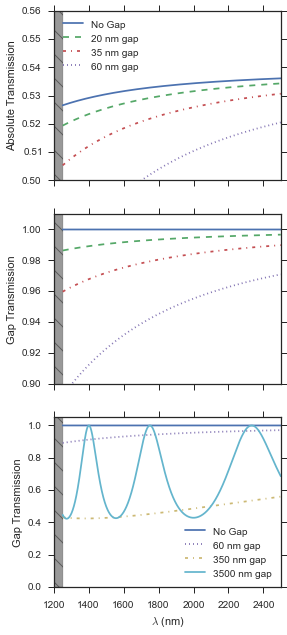

In [15]:
fig = plt.figure(figsize=(3.5,10))

fig.subplots_adjust(wspace=0.03, bottom=0.15,
                    top=0.95, left=0.07, right=0.97)

# Plot 1: Absolute transmission
ax = fig.add_subplot(311)
ax.plot(x,  T_gap_Si(x, 0), '-', label = 'No Gap')
ax.plot(x,  T_gap_Si(x, 20), '--', label = '20 nm gap')
ax.plot(x,  T_gap_Si(x, 35), '-.', label = '35 nm gap')
ax.plot(x,  T_gap_Si(x, 60), ':', label = '60 nm gap')
ax.set_ylim(0.5, 0.56)
ax.set_xlim(1200, 2500)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.set_ylabel('Absolute Transmission')
plt.fill_between([1200, 1250], 2.0, 0.0, hatch='\\', 
                 alpha=0.4, color='k', label='Si absorption cutoff')
plt.legend(loc='upper left')

# Plot 2: Relative transmission
ax = fig.add_subplot(312)
ax.plot(x,  T_gap_Si(x, 0)/T_DSP, '-', label = 'No Gap')
ax.plot(x,  T_gap_Si(x, 20)/T_DSP, '--', label = '20 nm gap')
ax.plot(x,  T_gap_Si(x, 35)/T_DSP, '-.', label = '35 nm gap')
ax.plot(x,  T_gap_Si(x, 60)/T_DSP, ':', label = '60 nm gap')
ax.set_ylim(0.9, 1.01)
ax.set_xlim(1200, 2500)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.set_ylabel('Gap Transmission')
plt.fill_between([1200, 1250], 2.0, 0.0, hatch='\\',
                 alpha=0.4, color='k', label='Si absorption cutoff')


# Plot 3: Relative transmission, larger gap
ax = fig.add_subplot(313)
ax.plot(x,  T_gap_Si(x, 0)/T_DSP, '-', label = 'No Gap')
ax.plot(x,  -10*x) #dummy for color change.
ax.plot(x,  -11*x) #dummy for color change.
ax.plot(x,  T_gap_Si(x, 60)/T_DSP, ':', label = '60 nm gap')
ax.plot(x,  T_gap_Si(x, 350)/T_DSP, '-.', label = '350 nm gap')
ax.plot(x,  T_gap_Si(x, 3500)/T_DSP, '-', label = '3500 nm gap')
ax.set_ylim(0.0, 1.05)
ax.set_xlim(1200, 2500)
ax.set_xlabel('$\lambda$ (nm)')
ax.set_ylabel('Gap Transmission')
plt.legend(loc='lower right')

plt.fill_between([1200, 1250], 2.0, 0.0, hatch='\\',
                 alpha=0.4, color='k', label='Si absorption cutoff')


plt.savefig("etalon_trans.pdf",  bbox_inches='tight')

The end.